# Logarithmic sorts

This file demonstrates data on the performance of various logarithmic sorts. The following algorithms were tested:
- Quick Sort (Median of 3 pivot)
- Quick Sort (Middle element pivot)
- Quick Sort (Random element pivot)
- Quick Sort (Median of medians pivot)
- Merge Sort

## Testing methods

- Each algorithm was tested on random data with sample size ranging from $10^5$ to $10^7$ with step size of $10^5$.
- Each test was performed 5 times and the average time was taken as a result.
- Seed for random number generator was created once and reused for each algorithm, which guarantees that the same array was generated for each algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("results/log_sorts.csv")
df = df.pivot(index="Sample Size", columns="Algorithm", values="Elapsed Time (ms)")
print(df.head(3))

Algorithm    Merge  QuickMedian3  QuickMedianMedian  QuickMiddle  QuickRandom
Sample Size                                                                  
100000           3             2                  5            2            2
200000           6             5                 11            5            5
300000          10             8                 17            7            8


## All sorts comparison

Here are the plots (in linear and logarithmic scale) of the recorded performance of all 5 sorting algorithms.

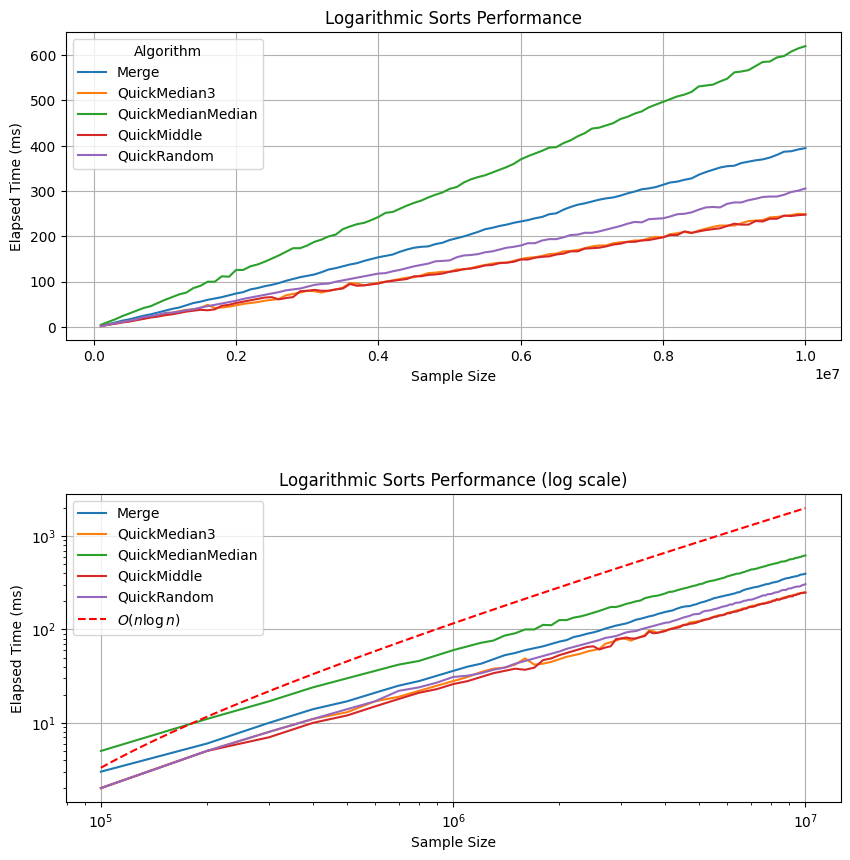

In [3]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
df.plot(
        ax=linear_scale,
        ylabel="Elapsed Time (ms)",
        title="Logarithmic Sorts Performance",
        grid=True)
df[df.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Logarithmic Sorts Performance (log scale)",
        legend=False,
        yticks=np.logspace(1, 3, 3, base=10),
        grid=True)
x = np.logspace(5, 7, 50, base=10)
x_scale = 10**-4/4
log_scale.plot(x, (x*x_scale)*np.log2(x*x_scale), '--r', label='$O(n\log n)$')
log_scale.legend()

Due to the small time it takes for sorts to finish, the time measurements seem to be imprecise, which leads to noticeable jaggedness of plots.

Logarithmic scale plot confirms that all three sorts have time complexity of $O(n \log n)$. However, all three sorts seem to be performing noticeably slower on sample sizes below $10^6$, which might be caused by additional time being spent on memory copying and allocation for merge sort and on calling the pivot selection and partition functions for quick sort.

Out of three algorithms, the quick sort with median-of-medians pivot selection performs noticeably slower. Logarithmic scale plot allows us to estimate that it is about 2-2.5 times slower than all the other algorithms. The difference in performance of quick sort with middle-element and median-of-three pivot selection is negligible. These two algorithms seem to be the most efficient of all five.

## Conclusions

The best logarithmic sorts algorithms seem to be quick sort with either median-of-three or middle-element pivot selection. Randomized pivot selections performs similarly, but seems to be about 20% slower. Merge sort and quick sort with median-of-medians pivot selection are clearly slower than other three algorithms, due to additional computations they have to perform. Median-of-medians pivot selection takes a long time, while not providing sufficient advantage, and merge sort needs to perform additional memory copying, which slows it down significantly.